# Bitcoin Price Prediction with Random Forest and Technical Indicators

After the all-time high of Bitcoin with a market capitalization of more than 500 Billion dollars, many people, including me want to know if the value of bitcoin will keep increasing or if it is a bubble like it was in 2017. That's my motivation why I write this post.

First I explain how I add features to the source dataset, which consists only of price history and trading volume. 

The wich technical indicators enrichened dataset is then used to train a   **Random Forest** classification model, which predicts wheaters the value of bitcoin increases or decreases in the future. 

All used libraries are listed in the Pipfile of the corresponding GitHub repository. The repository contains also an ipython notebook with the complete code.



## Create Dataset

Historic data of prices and volume can be obtained from quandl, which provides a python library. It's pretty straight forward since it loads the data directly into a pandas dataframe.


In [8]:
import quandl
import pandas as pd 
import numpy as np 

df = quandl.get('BCHARTS/KRAKENUSD', returns="pandas")
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


We could already try to use this dataframe to train a classification model, but I decided to add more features what usually makes a model more accurate.

I found a library called [ta](https://github.com/bukosabino/ta), which creates many technical indicators, like **moving averages** or **bollinger bands** (and many more). It is originally made for analyzing stock data, but should also work for bitcoin. The following code adds more than 80 features to the dataset. Check out the notebook on Github to see the output.

In [9]:
from ta import add_all_ta_features
from ta.utils import dropna

pd.set_option('display.max_columns', None)

df = dropna(df)
df = add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume (BTC)")

df = df.fillna(0)
df.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-24,23225.5,23750.0,22723.0,23718.6,4800.525211,1.115218e+08,23231.158403,927447.383680,601117.893890,0.329320,2.213943e+06,68.829000,-2.526571e+09,5.992690e+09,-121.244837,27616.487959,21808.253190,1282.309180,20786.945,25197.638999,16376.251001,42.437155,0.832335,0.0,0.0,22585.233333,24099.143333,21071.323333,13.406193,0.874318,0.0,0.0,17572.0,24297.7,20934.85,32.355404,0.913897,3.111222,1547.056477,1312.196770,234.859707,22171.791667,20375.869231,22316.232508,20769.176031,39.007520,28.444906,11.428288,1.269377,0.709300,0.560076,0.969866,25.582562,88.722870,-1622.845,225.261744,170.668198,54.593546,21800.05,20478.85,21139.45,18801.35,17133.400,15024.65,80.0,48.0,32.0,21406.710655,0.0,0.0,0.0,99.659653,69.014446,0.652105,0.666354,0.689688,38.285684,65.063223,91.389744,89.495022,-8.610256,3593.749706,22913.748062,26.116479,2.217041,3.534791,-1.317750,2.117821,2.095707,2828.222222
2020-12-25,23718.7,24777.7,23410.8,24698.6,6178.779515,1.493838e+08,24176.902575,932911.053883,607296.673404,0.344371,2.762695e+06,74.203396,1.897557e+10,7.599825e+09,356.960025,27616.487959,22187.016571,1290.768262,21064.225,25719.645333,16408.804667,44.202152,0.890338,0.0,0.0,23080.133333,24680.473333,21479.793333,13.867684,1.005663,1.0,0.0,17572.0,24777.7,21174.85,34.208237,0.989023,2.123744,1622.506110,1374.258638,248.247472,22633.000000,20626.038462,22682.750584,21060.244474,39.840568,32.143651,10.523913,1.315321,0.649365,0.665956,1.012151,25.320578,103.456143,-1783.125,246.112895,184.687813,61.425082,23021.05,20718.85,21869.95,19159.20,17192.325,15175.65,100.0,44.0,56.0,21753.629376,0.0,0.0,0.0,99.829826,72.398070,0.714399,0.650676,0.657303,39.414155,67.149206,98.828790,91.431514,-1.171210,3514.369118,23236.869333,28.879520,0.797824,2.987398,-2.189574,4.131778,4.048701,2949.209877
2020-12-26,24703.8,26800.0,24500.0,26441.2,9648.055367,2.478542e+08,25689.549258,939548.915975,616944.728772,0.358148,4.769838e+06,75.932361,3.708753e+10,9.383180e+09,936.008228,27616.487959,22670.034399,1391.691436,21416.640,26554.719381,16278.560619,47.982124,0.988953,0.0,0.0,23596.243333,25199.083333,21993.403333,13.585552,1.387474,1.0,0.0,17572.0,26800.0,22186.00,43.087991,0.961118,1.736871,1802.139799,1459.834870,342.304929,23229.675000,20885.003846,23260.973571,21458.833772,41.417835,39.139544,9.204068,1.326179,0.606474,0.719705,1.068098,25.198521,132.810177,-1976.940,268.030006,200.288390,67.741616,24342.80,22186.00,23264.40,20460.05,17507.525,15455.05,100.0,40.0,60.0,22176.999263,0.0,0.0,0.0,99.914913,77.171735,0.917897,0.761467,0.692832,42.173522,69.310812,95.563469

The next step is to create the classes we want to predict. To make the problem not too complex, I decided to only predict where the value of a Bitcoin will be larger or smaller looking 7 days into the future. Predicting binary classes is much easier than predicting actual values.

In [10]:
y = (df['Close'].shift(periods = -7,fill_value = 0) - df['Close'])
y = (y > 0)

#remove last 7 rows, because of the shift
x = df[:-7]
y = y[:-7]

x.shape,y.shape

((2492, 90), (2492,))

Next, we need to divide the dataset into test and training data. The First 2000 days for training and the remaining 491 days for testing.

In [11]:
num_test = 491
x_train = x[:-num_test]
y_train = y[:-num_test]
x_test = x[-num_test:]
y_test = y[-num_test:]

This is the fun part, creating the **Random Forest Classifier** and train it. Other classification models would also work of course. I just choose random forest, because I personally like it.

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=17)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

## Test the model

In [48]:
res = clf.predict(x_test)
acc = (res== y_test.values).mean()
print(acc)

0.5804480651731161



The prediction is in 58% of the cases correct. Testing it with training dataset results in an accuracy of 72% what is not surprising, since such models tend to overfit.

## Visualize Results

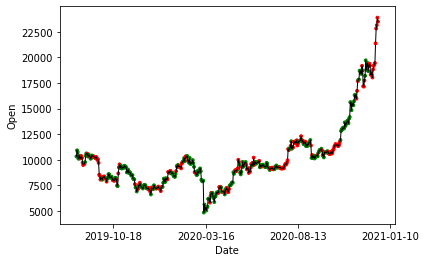

In [54]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test]

ax = plt.gca()
ax.plot(x_test['Open'],lw = 1, c = 'black')
x_test.reset_index().plot.scatter( x = 'Date', y = 'Open',color = colors,s = 8,ax= ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))


## Interpretation

The **Random Forest** model correctly forecasted the decline in march 2020, which was at the beginning of the corona crisis. However, the rise at the end of 2020 was not predicted correctly.


The model relies completely on technical data, which is belied by many people to be almost random. I expect significant improvements when considering also the fundamentals. Examples could be Google search volume for the term Bitcoin or analyzing the Blockchain. Especially the Blockchain could be pretty valuable since it contains all transactions since the beginning in 2010. I already found this source to get more data, but had not yet the time to try it out.